## Task 4

In [13]:
using Pkg
cd("C:\\Users\\patsc\\Documents\\Project2\\Samuel-Dick__Patrick-Schmidt-2504-2023-PROJECT2")
Pkg.activate(".")
include("..\\GeneralizedUnreliableJacksonSim.jl")


  Activating project at `C:\Users\patsc\Documents\Project2\Samuel-Dick__Patrick-Schmidt-2504-2023-PROJECT2`

test_four

For this task we were required to consider the effects of changing $c_s$ and R values on the total mean queue length. In order to do so, code was created to easily develop readable plots. This can be found in the <code>task_four.jl</code>. Below we have this code.

In [ ]:
function task_four(scenario::NetworkParameters, scenario_num; reps::Int64=2, max_time::Float64= Float64(10^5), warm_up_time::Int64=10^3)
    c_s_values = [0.1, 0.5, 1.0, 2.0, 4.0]
    scenario_num == 4 ? (ρ_grid = 0.1:0.05:0.9) : (ρ_grid = 0.1:0.01:0.9)
 
    #consider only for scenario 1 for fixed R and varying c_s
    R = 0.75
    test_scenarios_c_s = [[set_scenario(scenario, ρ, c_s, R) for ρ in ρ_grid] for c_s in c_s_values]

    p = plot(title="Scenario $scenario_num varying cₛ", label="Simulated", xlabel="ρ*", ylabel="Total mean queue length", legend=:topleft)

    #Consider each ρ with a loop through the test_scenarios
    for (c_s_index, c_s_scenario) in enumerate(test_scenarios_c_s)
        total_mean_queue_lengths = []
        #consider varying c_s
        for scen in c_s_scenario 
            total_mean_q_length = []
            #iterate through reps
            for _ in 1:reps
                mean_q_length = sim_net(scen, max_time = Float64(10^4), warm_up_time = 100)[1]
                total_mean_q_length = push!(total_mean_q_length, mean_q_length) 
            end
        total_mean_queue_lengths = push!(total_mean_queue_lengths, sum(total_mean_q_length)/reps) 
        end
        plot!(ρ_grid, total_mean_queue_lengths, label = "cₛ = $(c_s_values[c_s_index])")
    end 
    R_values = [0.25, 0.75, 1.0]
    scenario_num == 4 ? (ρ_grid = 0.1:0.05:0.9) : (ρ_grid = 0.1:0.01:0.9)
 
    #Consider only scenario 1 with varying R
    c_s = 0.5
    test_scenarios_R = [[set_scenario(scenario, ρ, c_s, R) for ρ in ρ_grid] for R in R_values]

    q = plot(title="Scenario $scenario_num varying R", label="Simulated", xlabel="ρ*", ylabel="Total mean queue length", legend=:topleft)

    #consider each ρ with a loop through the test scenarios
    for (R_index, R_scenario) in enumerate(test_scenarios_R)
        total_mean_queue_lengths_R = []
        #consider varying c_s
        for scen in R_scenario 
            total_mean_q_length_R = []
            #iterate through reps
            for _ in 1:reps
                mean_q_length_R = sim_net(scen, max_time = Float64(10^4), warm_up_time = 100)[1]
                total_mean_q_length_R = push!(total_mean_q_length_R, mean_q_length_R) 
            end
        total_mean_queue_lengths_R = push!(total_mean_queue_lengths_R, sum(total_mean_q_length_R)/reps) 
        end
        plot!(ρ_grid, total_mean_queue_lengths_R, label = "R = $(R_values[R_index])")
    end
    plot(p,q)
end

As can be seen above, the code involves basic for loops that iterate through the different scenarios based off changing $c_s$ and $\rho$ values for the first case and $R, \rho$ values for the second. 

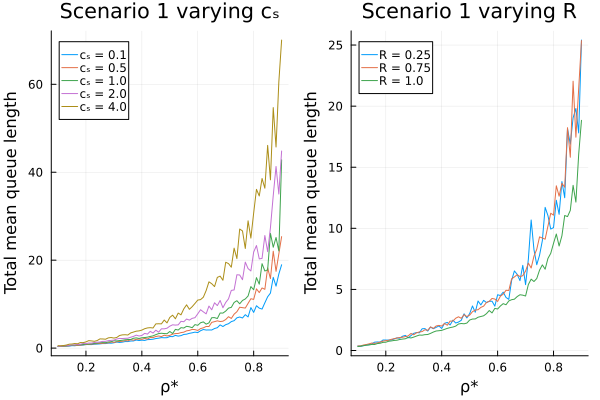

In [12]:
#scenario 1
task_four(scenario1, 1)

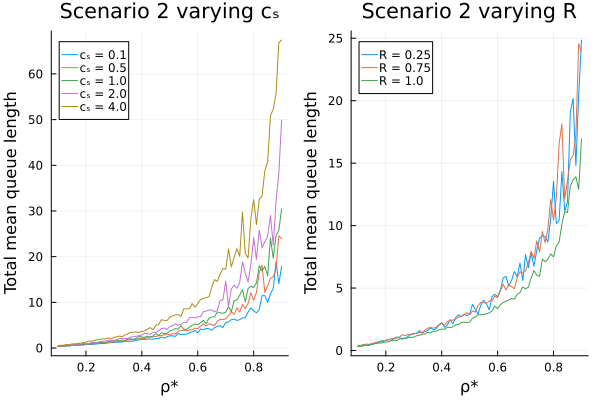

In [13]:
#scenario 2
task_four(scenario2, 2)

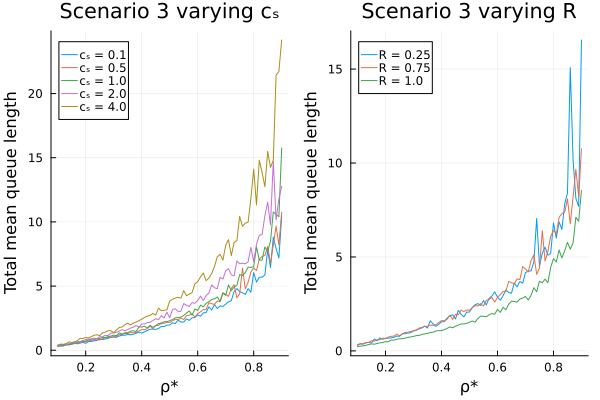

In [14]:
#scenario 3
task_four(scenario3,3)

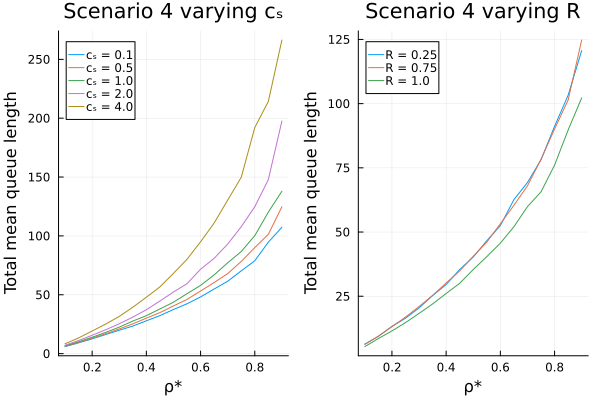

In [14]:
#scenario 4
task_four(scenario4,4)

It is expected that as $c_s$ increases, so to does the mean queue length. Indeed, this is the case for all 4 scenarios. Similarly, a decrease in R values should theoretically have the same result. Evidently, this is the case once again for all 4 scenarios. Ideally, the increments for $\rho^*$ would be decreased in length however, this leads to very long run times and the trend still evident from these curent increments. The same is the case for an increase in time. 